In [1]:
!pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
!pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-8x83msqt
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-8x83msqt
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.5 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=6c0ee167ab1f41609922f1d3a6e49fdf5505f77e4d35ebdaa1f40aaf9538f440
  Stored in directory: /tmp/pip-ephem-wheel-cache-xpjnumk4/wheels/3f/7c/a4/9b490845988bf7a4db33674d52f709f088f64392063872eb9a
Successfully built clip


Please upload images (JPG, JPEG, PNG, WEBP, GIF, BMP) for classification...


Saving cat.jpg to cat (1).jpg

Selected Random Image: cat (1).jpg

Displaying Selected Image: cat (1).jpg


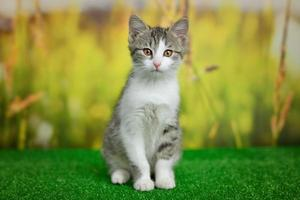


Predicted Label: a cat

Similarity Scores:
a cat: 32.9315
a dog: 28.0433
a lion: 24.5019
a tiger: 24.9037
a bear: 22.8559
a horse: 24.5429
a cow: 24.2485
a sheep: 22.8231
a goat: 26.6879
a rabbit: 26.4943
a bird: 25.7696
a fish: 24.8046
a shark: 22.0554
a dolphin: 21.5786
a whale: 19.9188
a penguin: 22.4232
a snake: 23.9100
a lizard: 22.6829
a turtle: 21.9128
a frog: 23.4454
a butterfly: 23.4422
a bee: 23.7079
a chicken: 24.8183
a rooster: 20.3742
a duck: 23.6373
a goose: 24.6576
a swan: 21.1443
a peacock: 15.9832
a parrot: 22.2279
a hawk: 23.2184
a crow: 20.7770
a sparrow: 22.8303
an owl: 22.5908
a bat: 23.8354
a fox: 24.4379
a wolf: 26.1697
a kangaroo: 24.3625
a gorilla: 17.7439
a monkey: 23.7131
a zebra: 20.1001
a giraffe: 22.9313
a rhino: 17.7470
a hippo: 17.4393
an elephant: 20.8658
a camel: 19.2632
a buffalo: 17.7911
a reindeer: 21.2038
a polar bear: 20.5712
a panda: 21.9273
a cheetah: 20.6831
a jaguar: 18.6644
a flamingo: 20.2293
a moose: 21.1482
a chimpanzee: 16.2065
a crocodi

In [5]:
import torch
import clip
import os
import random
import pandas as pd
from PIL import Image
from IPython.display import display
from google.colab import files

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

csv_path = "/content/vsdatasets.csv"
df = pd.read_csv(csv_path)
labels = df['Label'].tolist()

print("Please upload images (JPG, JPEG, PNG, WEBP, GIF, BMP) for classification...")
uploaded_files = files.upload()

supported_formats = (".jpg", ".jpeg", ".png", ".webp", ".gif", ".bmp")
image_files = [file for file in uploaded_files.keys() if file.lower().endswith(supported_formats)]

if not image_files:
    raise ValueError("No valid image files were uploaded. Please upload at least one.")

random_image_path = random.choice(image_files)
print(f"\nSelected Random Image: {random_image_path}")
image = Image.open(random_image_path).convert("RGB")
image_processed = preprocess(image).unsqueeze(0).to(device)

print(f"\nDisplaying Selected Image: {random_image_path}")
display(image)

text_inputs = clip.tokenize(labels).to(device)

with torch.no_grad():
    image_features = model.encode_image(image_processed)
    text_features = model.encode_text(text_inputs)
    similarity = torch.matmul(image_features, text_features.T).squeeze(0)

best_match_idx = similarity.argmax().item()
best_match = labels[best_match_idx]
print(f"\nPredicted Label: {best_match}")

print("\nSimilarity Scores:")
for label, score in zip(labels, similarity.tolist()):
    print(f"{label}: {score:.4f}")
